# Question 1
A decision tree is a flowchart-like structure used for classification and regression. It contains nodes, which are features of variables to be evaluated, branches, which are the possible decisions, and leaves, which are the final outputs. Decisions trees can be useful in assigning data points to categories and regression problems where you have categorical data and continuous output. A real life example of this would be insurance. A decision tree could help with estimating premiums based on the attributes of the client. It could also classify symptoms into a sickness or predict prices of houses based on factors like location, size, etc. When the answer is a continuous variable this is done by using the predicted means for the specific classification so unlike multiple linear regression decision trees can't give overly specific answers but decision trees are good to use when you have a lot of categories.

Summary:
What is a Decision Tree?
A decision tree is a model used to make predictions for either categories (classification) or numbers (regression).
It works like a flowchart, asking a series of yes/no questions to reach a prediction.
Key Features of Decision Trees
Can handle both numerical and categorical data.
Does not assume any specific relationship between features and the target (non-parametric).
Splits data into branches to minimize errors in predictions.
Applications of Decision Trees
Predicting diseases in medicine.
Detecting fraud in financial transactions.
Estimating house prices in real estate.

# Question 2
1. Accuracy: This calculates the proportion of correct classifications, both true negatives and true positives. Accuracy most appropriatly addresses situations where every classification error is equally not desirable. For example, when sorting emails into span or not-spam, marking spam as not-spam or not-spam as spam are both mistakes that you wouldn't want to happen the same amount. One error is not way worse than the other. 

2. Sensitivity:This measures a models ability to correctly identify positive instances so it looks at true positives and false negatives. Sensitivity is best used when missing a positive case has negative consequences, moreso than missing a negative case. A real world example would be detecting serious sicknesses in patients. In this case it is very important to catch all of the positive cases because a missed positive test could be detrimental to a patients health and wellbeing. 

3. Specificity: This is the opposite of sensitivity and measures the correct amount of negatives. Specificity would be used when it is important to avoid false positives. A real world scenario that benefits from specificity would be legal cases. Convicting an innocent person of a crime is a terrible action that could ruin someone's life so it would be very important to avoid false positives in legal cases. 

4. Precision: This measures the number of positive identifications that were actually correct. The difference between precision and sensitivity is that precision looks at everything that was classified as positive and checks the accuracy while sensitivity only cares about things that are truly positive and then checks how they were classified. Precision would be useful in an example like search engines. It would be very important to show users the best results for what they searched and having non-relevant results(false positives) could reduce user satisfaction. In this instance quality of positives is the most important thing. 

Summary:
Accuracy
Measures how many predictions were correct overall (both true positives and true negatives).
Best used when the classes are balanced, and all errors are equally important
Sensitivity (Recall)
Measures how good the model is at identifying actual positive cases.
Important when missing a positive case is critical, like in medical diagnoses (e.g., cancer detection) or fraud detection.
Specificity
Measures how good the model is at identifying actual negative cases.
Important when falsely identifying negatives as positives is costly, like in spam detection or legal cases.
Precision
Measures how accurate the positive predictions are.
Crucial when false positives are costly, like in fraud detection or recommending products.
Key Differences Between Sensitivity and Precision
Sensitivity focuses on finding as many actual positives as possible, even if some negative cases are wrongly flagged as positive.
Precision focuses on ensuring that positive predictions are accurate, even if it means missing some actual positives.

# Link for Question 1 + 2: https://chatgpt.com/share/6738f3bd-1ae4-800d-bcb1-11fb5b11b4a5

# Question 3

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

In [2]:
#drop the specified columns
ab_reduced_noNaN = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

#drops other NA values
ab_reduced_noNaN = ab_reduced_noNaN.dropna()

# Convert 'Pub year' and 'NumPages' to int, and 'Hard_or_Paper' to category
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None

Descriptive Statistics:
       List Price  Amazon Price    NumPages     Pub year       Thick
count  319.000000    319.000000  319.000000   319.000000  319.000000
mean    18.362978     12.941034  334.272727  2002.175549    0.903448
std     13.976755     12

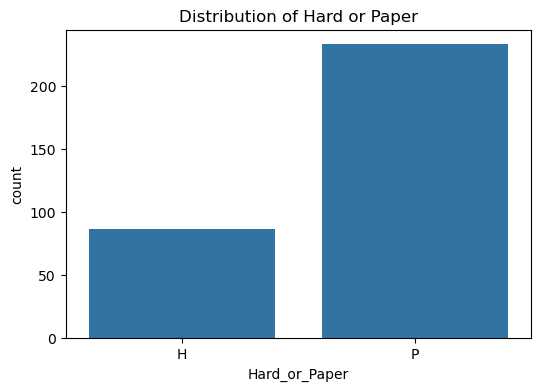

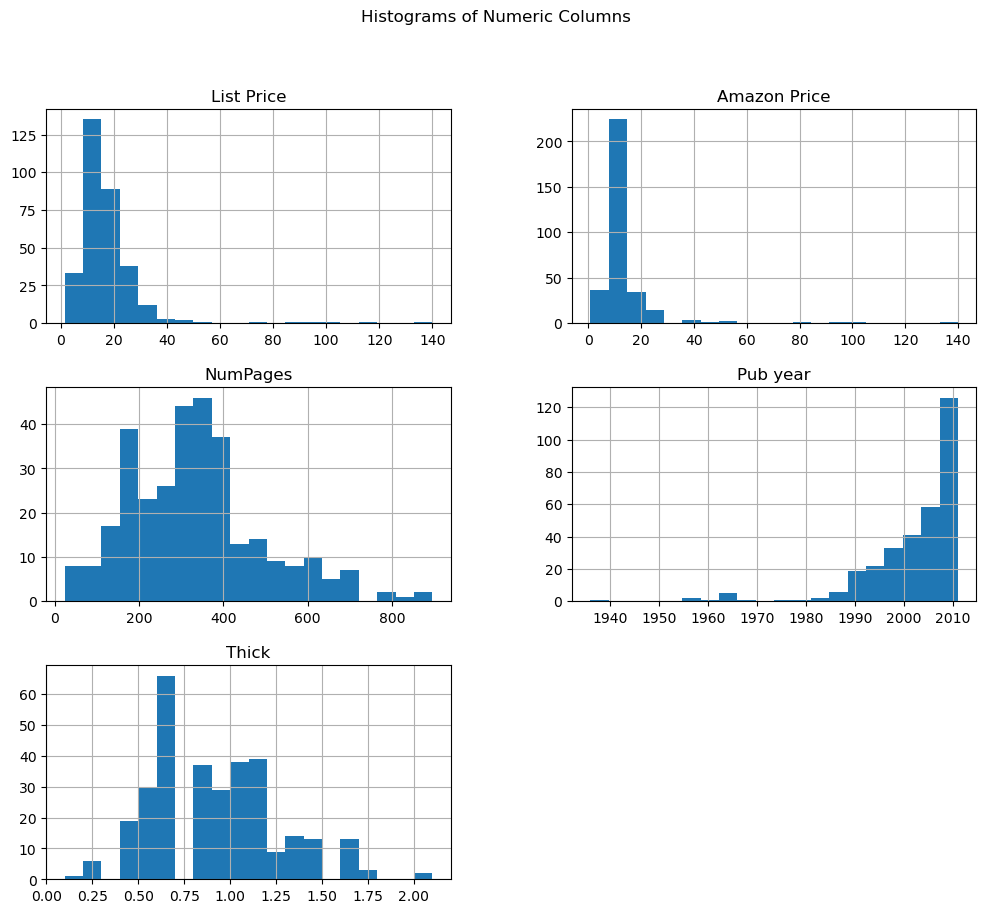


Value Counts for 'Pub year':
Pub year
2011    52
2010    39
2009    20
2006    18
2004    16
2008    15
1999    13
2003    13
2002    12
2005    12
2007    12
1993     9
2001     9
1995     8
2000     7
1996     7
1998     7
1989     6
1997     6
1990     5
1994     5
1991     4
1992     4
1987     3
1964     2
1963     2
1988     2
1982     2
1979     1
1985     1
1976     1
1957     1
1965     1
1955     1
1967     1
1959     1
1936     1
Name: count, dtype: int64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics and basic information
print("Dataframe Information:")
print(ab_reduced_noNaN.info())

print("\nDescriptive Statistics:")
print(ab_reduced_noNaN.describe())

# Check for missing values
print("\nMissing Values:")
print(ab_reduced_noNaN.isnull().sum())

# Data type distribution
print("\nData Types:")
print(ab_reduced_noNaN.dtypes)

# Count plot for categorical data (e.g., 'Hard_or_Paper')
plt.figure(figsize=(6, 4))
sns.countplot(data=ab_reduced_noNaN, x='Hard_or_Paper')
plt.title('Distribution of Hard or Paper')
plt.show()

# Histogram for numeric columns
numeric_columns = ab_reduced_noNaN.select_dtypes(include=['int64', 'float64']).columns
ab_reduced_noNaN[numeric_columns].hist(bins=20, figsize=(12, 10))
plt.suptitle('Histograms of Numeric Columns')
plt.show()

# Value counts for 'Pub year' (or other categorical-like columns if needed)
print("\nValue Counts for 'Pub year':")
print(ab_reduced_noNaN['Pub year'].value_counts())


Summary:
Data Cleaning and Transformation:
You wanted to remove specific columns (Weight_oz, Width, and Height) from your dataframe and store the result in a new dataframe called ab_reduced_noNaN.
You requested to convert the data types of Pub year and NumPages to integers, and the data type of Hard_or_Paper to a categorical type.
Exploratory Data Analysis (EDA):
I provided a detailed Python code for performing EDA on the dataframe. This included:
Summary statistics and basic info (info(), describe()).
Checking for missing values.
Visualizing distributions using histograms and count plots.
Exploring correlations between numeric variables using a heatmap.
Identifying outliers with boxplots.
Value counts for categorical columns like Pub year.

# Question 4

In [4]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
train_set, test_set = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Show the shapes of the resulting datasets
print(f"Training Set Shape: {train_set.shape}")
print(f"Testing Set Shape: {test_set.shape}")

# Print the number of observations in each set
print(f"Number of observations in the training set: {train_set.shape[0]}")
print(f"Number of observations in the testing set: {test_set.shape[0]}")

Training Set Shape: (255, 10)
Testing Set Shape: (64, 10)
Number of observations in the training set: 255
Number of observations in the testing set: 64


# Part of Answer for 4
There are 255 observations, or rows in the training set and 64 in the testing set. This makes sense since training is supposed to be substantially bigger than testing. 

y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

These two steps are preparing the data for a decision tree. The first one takes the categorical column "Hard or Paper" and separates it into two different columns "Hard" and "Paper". pd.get_dummies() makes them into indicator variables and since "H" is selected this means that 1=Hard and 0=Paper. This means that y will be a series of binary values representing if a book is hardcover or softcover. The second step selects the variable "List Price" as the predictor value. This means that we are setting up a decision tree that will select hardcover or softcover based off of List Price. 

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Step 1: Prepare the feature (X) and target (y)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target: 1 for 'Hard' and 0 for 'Paper'
X = ab_reduced_noNaN[['List Price']]  # Feature: List Price

# Step 2: Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Step 4: Train the model
clf.fit(X_train, y_train)

# Step 5: Evaluate the model (optional)
print(f"Training Accuracy: {clf.score(X_train, y_train):.4f}")
print(f"Testing Accuracy: {clf.score(X_test, y_test):.4f}")


Training Accuracy: 0.8314
Testing Accuracy: 0.8438


[Text(0.5, 0.8333333333333334, 'x[0] <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [189, 66]'),
 Text(0.25, 0.5, 'x[0] <= 10.8\ngini = 0.212\nsamples = 183\nvalue = [161, 22]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.369\nsamples = 45\nvalue = [34, 11]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.147\nsamples = 138\nvalue = [127, 11]'),
 Text(0.75, 0.5, 'x[0] <= 27.275\ngini = 0.475\nsamples = 72\nvalue = [28, 44]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.39\nsamples = 49\nvalue = [13, 36]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.454\nsamples = 23\nvalue = [15, 8]')]

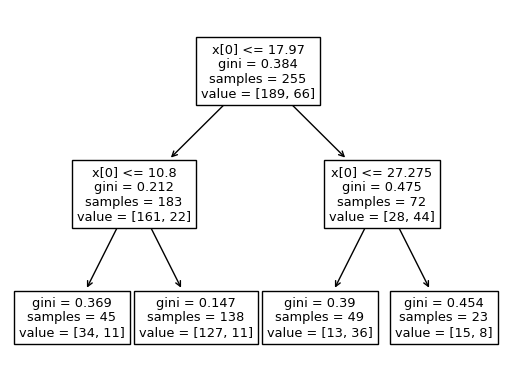

In [6]:
tree.plot_tree(clf)

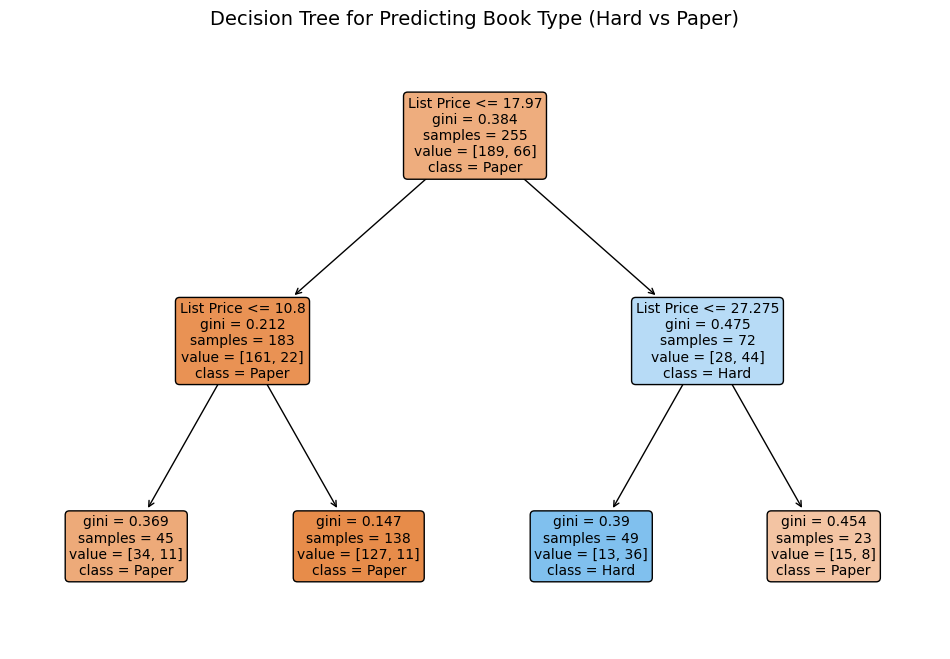

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Step 1: Plot the trained decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, 
          feature_names=['List Price'],  # Feature name
          class_names=['Paper', 'Hard'],  # Class names
          filled=True,  # Color the nodes based on the majority class
          rounded=True,  # Rounded corners for better readability
          fontsize=10)  # Font size of labels

# Step 2: Show the plot
plt.title("Decision Tree for Predicting Book Type (Hard vs Paper)", fontsize=14)
plt.show()


The decision tree predicts whether a book is going to be paperback or hardcover basaed off of the list price. The tree shows that at a high enough price the book would most likely be a hard cover, but for lower prices it would be a paperback.

Summary:
Data Preparation and Model Setup:
You prepared your data for training a DecisionTreeClassifier by defining:
y: The target variable, which indicates whether a book is a "Hard" cover (1) or "Paper" cover (0), using one-hot encoding.
X: The feature variable, which in this case is just the List Price column.
Training the Decision Tree:
I provided the code to train a DecisionTreeClassifier model using List Price to predict whether a book is a hard cover or paperback. The model was set with a max_depth=2 to limit the complexity of the tree.
The model was trained using the fit() method, and its accuracy on both the training and testing sets was evaluated.
Visualization of the Decision Tree:
I gave you code to visualize the trained decision tree using plot_tree() from sklearn.tree. This allows you to see how the tree makes decisions based on List Price, with labels indicating whether a book is hard cover or paperback at each split.

# Question 5

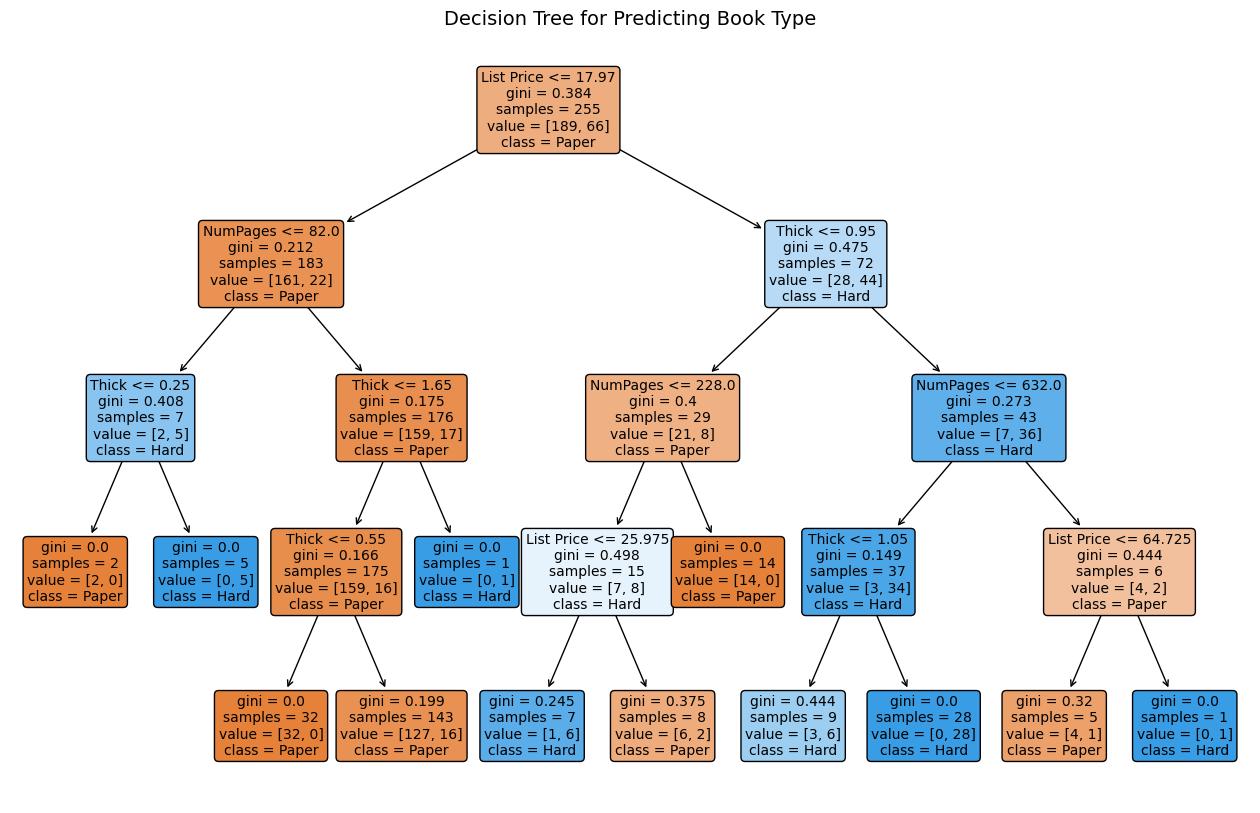

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Define the features (X) and target (y)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target: 1 for 'Hard', 0 for 'Paper'
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]   # Features

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)  # Set max_depth=4
clf.fit(X_train, y_train)

# Step 4: Visualize the decision tree
plt.figure(figsize=(16, 10))  # Set figure size for better readability
plot_tree(clf, 
          feature_names=X.columns,  # Use feature names
          class_names=['Paper', 'Hard'],  # Target class names
          filled=True,  # Fill nodes with colors based on classification
          rounded=True,  # Use rounded corners
          fontsize=10)  # Adjust font size

plt.title("Decision Tree for Predicting Book Type", fontsize=14)
plt.show()


Compared to the decision tree in question 4 this tree has more variables used to make the decision between hardcover or paperback. It starts with list price just like in question 4 but after that it uses number of pages and thickness of book as well. These decisions are made based off of which split will make the most sense for classifying the books. 

Summary:Training a Decision Tree with Multiple Features:

You wanted to train a decision tree classifier using three features: NumPages, Thick, and List Price, with a max_depth of 4.
I provided code to train and visualize the decision tree using plot_tree from sklearn.tree.
How Decision Trees Make Predictions:

I explained the process of making predictions in a decision tree:
Starting at the root node, the model evaluates conditions based on feature values and traverses through child nodes until it reaches a leaf node.
The leaf node determines the predicted class based on the majority class of training data in that node.
An example walkthrough was provided, showing how a sample input would traverse the tree and result in a prediction.
Code for Making Predictions:

I shared a snippet demonstrating how to use the trained classifier’s .predict() method to predict the class for a new data point.

# Link for question 3, 4, 5(use ofr 6 as well): https://chatgpt.com/share/6738fa37-3648-800d-9eda-89fdb4c081ec

# Question 6

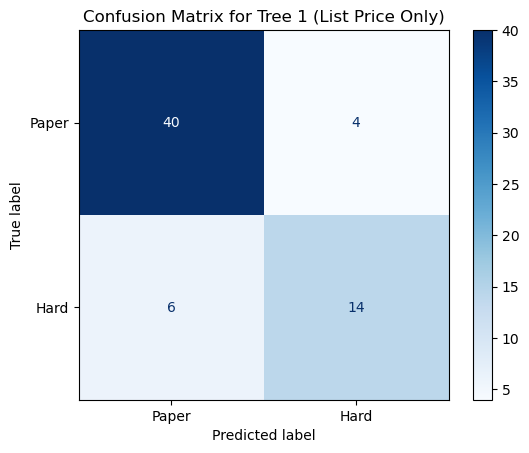

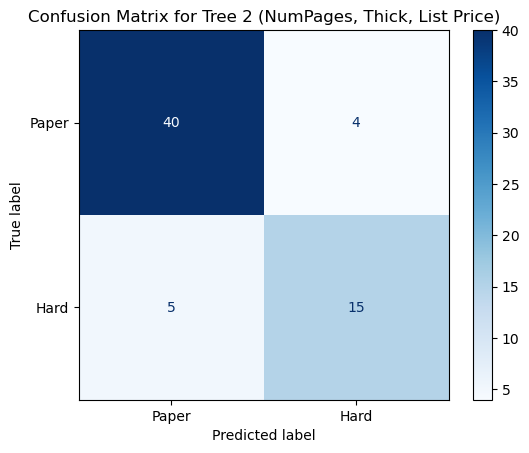

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Prepare training and testing datasets
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target variable
X_1 = ab_reduced_noNaN[['List Price']]  # Features for the first tree
X_2 = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]  # Features for the second tree

# Train-test split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.2, random_state=42)

# Step 2: Train the two decision trees
# Tree 1: Using List Price only
clf_1 = DecisionTreeClassifier(max_depth=2, random_state=42)
clf_1.fit(X_train_1, y_train_1)

# Tree 2: Using NumPages, Thick, and List Price
clf_2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf_2.fit(X_train_2, y_train_2)

# Step 3: Generate predictions for the testing datasets
y_pred_1 = clf_1.predict(X_test_1)  # Predictions for Tree 1
y_pred_2 = clf_2.predict(X_test_2)  # Predictions for Tree 2

# Step 4: Create and display confusion matrices
# Confusion matrix for Tree 1
cm_1 = confusion_matrix(y_test_1, y_pred_1)
ConfusionMatrixDisplay(cm_1, display_labels=['Paper', 'Hard']).plot(cmap='Blues')
plt.title("Confusion Matrix for Tree 1 (List Price Only)")
plt.show()

# Confusion matrix for Tree 2
cm_2 = confusion_matrix(y_test_2, y_pred_2)
ConfusionMatrixDisplay(cm_2, display_labels=['Paper', 'Hard']).plot(cmap='Blues')
plt.title("Confusion Matrix for Tree 2 (NumPages, Thick, List Price)")
plt.show()


In [10]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Tree 1
cm_1 = confusion_matrix(y_test_1, y_pred_1)
TN_1, FP_1, FN_1, TP_1 = cm_1.ravel()

# Metrics for Tree 1
sensitivity_1 = TP_1 / (TP_1 + FN_1)
accuracy_1 = (TP_1 + TN_1) / cm_1.sum()
specificity_1 = TN_1 / (TN_1 + FP_1)

# Confusion matrix for Tree 2
cm_2 = confusion_matrix(y_test_2, y_pred_2)
TN_2, FP_2, FN_2, TP_2 = cm_2.ravel()

# Metrics for Tree 2
sensitivity_2 = TP_2 / (TP_2 + FN_2)
accuracy_2 = (TP_2 + TN_2) / cm_2.sum()
specificity_2 = TN_2 / (TN_2 + FP_2)

# Print results
print("Tree 1 (List Price Only):")
print(f"Sensitivity: {sensitivity_1:.2f}")
print(f"Accuracy: {accuracy_1:.2f}")
print(f"Specificity: {specificity_1:.2f}\n")

print("Tree 2 (NumPages, Thick, List Price):")
print(f"Sensitivity: {sensitivity_2:.2f}")
print(f"Accuracy: {accuracy_2:.2f}")
print(f"Specificity: {specificity_2:.2f}")


Tree 1 (List Price Only):
Sensitivity: 0.70
Accuracy: 0.84
Specificity: 0.91

Tree 2 (NumPages, Thick, List Price):
Sensitivity: 0.75
Accuracy: 0.86
Specificity: 0.91


For tree one, which only uses List Price, the sensitivity is 70% which means that 70% of hardcover books were correctly identified, the accuracy is 84% meaning that it correctly predicts 84% of books, and the specificity is 91% which means that 91% of paperback books were correctly identified. For tree2, where there is List Price, Num Pages, and Thick, the sensitivity is 75% which means that 75% of hardcover books were correctly identified, the accuracy is 86% meaning that it correctly predicts 86% of books, and the specificity is 91% which means that 91% of paperback books were correctly identified

Summary:Confusion Matrices for Decision Trees:

You asked to create confusion matrices for the two decision trees trained earlier:
Tree 1: Trained with the List Price feature.
Tree 2: Trained with NumPages, Thick, and List Price.
I provided the full code to compute and visualize confusion matrices using confusion_matrix and ConfusionMatrixDisplay from scikit-learn.
Evaluation Metrics (Sensitivity, Accuracy, Specificity):
You requested the sensitivity, accuracy, and specificity of each model.
I explained the formulas for these metrics:
I shared code to compute these metrics for both models using their respective confusion matrices.

# Question 7
The difference between these two matrices comes from the input features used for prediction. The first matrix only uses the list price as a predictor while the second one uses list price along with the number of pages and the thickness of the book. List Price alone is a good indicator so the first matrix might do well but the second one, with its added predictors, should be able to predict better with more nuance. 

These two  matrices evaluate how well the model does based on the data it was trained on. This makes the two new matrices worse than the matrices above in question 6 which are tested on testing data because it is more important for a model to do well on testing data than on training data. The ability to generalize and make good predictions on new data is what makes a model good because it makes them work better in practical situations

Summary: 
Confusion Matrices for Different Feature Sets:
You asked about two confusion matrices for a decision tree model:
One using List Price as the sole feature.
The other using NumPages, Thick, and List Price as features.
I explained the differences between the two matrices, emphasizing how the models differ in complexity and the features used for predictions.
Training vs. Testing Data in Confusion Matrices:
You introduced confusion matrices evaluated on training data, and I explained:
Training data evaluates how well the model performs on data it was trained on, often resulting in inflated metrics.
Testing data provides an unbiased assessment of a model’s ability to generalize to unseen data, making it more reliable for evaluating performance.
I highlighted that training data results may suffer from overfitting and should not be used as the sole measure of model quality.
Why Testing Data Metrics are Superior:
Metrics from testing data are a better indicator of real-world performance.
Training data metrics are useful for debugging and ensuring the model has learned patterns, but they should not guide decisions about model quality.

# Question 8

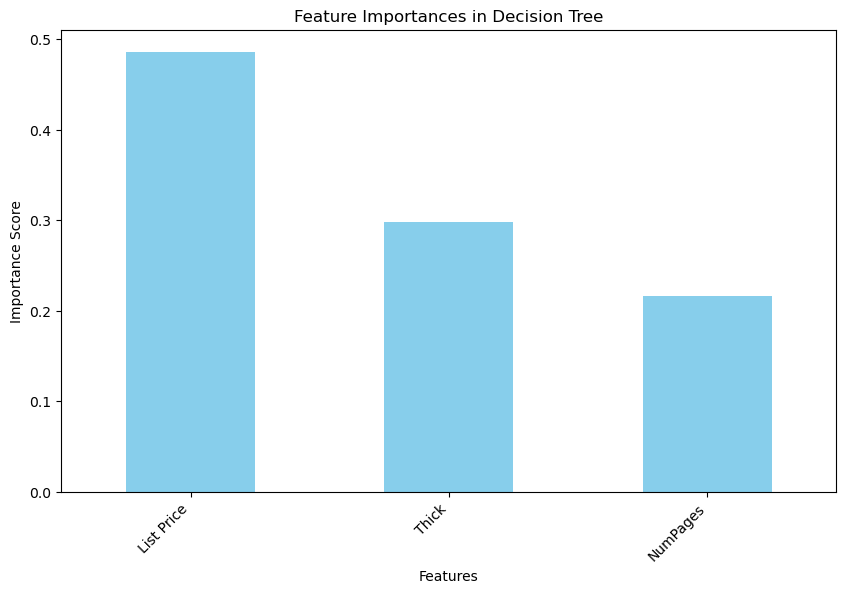

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature names based on the columns used for training
feature_names = ['NumPages', 'Thick', 'List Price']

# Step 1: Retrieve feature importances
feature_importances = clf_2.feature_importances_

# Step 2: Pair feature names with importances
features = pd.Series(feature_importances, index=feature_names)

# Step 3: Sort features by importance
sorted_features = features.sort_values(ascending=False)

# Step 4: Plot feature importances
plt.figure(figsize=(10, 6))
sorted_features.plot(kind='bar', color='skyblue')
plt.title('Feature Importances in Decision Tree')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.show()


This shows that for clf2 List Price is the most important for making predictions when using a decision tree.

Summary: Visualizing Feature Importances for clf2:

You asked to visualize the feature importances of the decision tree clf2.
I provided code using clf.feature_importances_ to extract and plot the importance of the features (NumPages, Thick, and List Price).
Issue with Undefined Variables:

The environment lacked definitions for clf2 and feature_names.
I requested the full training code for clf2 to recreate the model and clarified how to define feature_names explicitly based on the feature columns used during training.
Updated Visualization Code:

I shared the complete and corrected code to:
Define feature_names as ['NumPages', 'Thick', 'List Price'].
Retrieve and sort feature importances.
Create a bar plot showing the relative importance of features in the decision tree.

# Link for question 3, 4, 5, 6, 7, 8: https://chatgpt.com/share/6738fa37-3648-800d-9eda-89fdb4c081ec

# Question 9
In linear regression, the coefficients show how much the target changes if a feature increases by one unit, while keeping other features the same. In decision trees, feature importance tells us which features the tree used the most to make decisions, but it doesn’t say exactly how those features affect the target.

Summary:
 We discussed how to interpret coefficients in linear regression compared to feature importances in decision trees. Coefficients in linear regression show how a feature directly affects the target variable, assuming all other features stay constant. In contrast, feature importances in decision trees highlight which features were most useful for the model but don't show their exact impact on the target. Let me know if you’d like more clarification!
 
 # Link for question 9:https://chatgpt.com/share/673d4f04-e118-800d-9d6f-807ad0bfc8b5